## Week4 Vision


### 문제 1

1-stage-detector와 2-stage-detector의 차이를 설명해주세요.


#### 1-stage-detector의 경우 객체의 위치를 찾는 과정과 분류하는 과정이 따로 진행되는데 반해 2-stage-detector의 경우 객체의 위치를 찾는 과정과 분류하는 과정이 동시에 이루어진다.

### 문제 2
IoU(Intersection over Union) 기반 객체 탐지 평가

아래 코드의 빈칸을 완성시켜 실행해주세요.

In [1]:
import numpy as np

def calculate_iou(box1, box2):
    """
    두 개의 바운딩 박스를 입력받아 IoU(Intersection over Union)를 계산하는 함수
    box1, box2는 (x1, y1, x2, y2) 형식
    """
    x1, y1, x2, y2 = box1
    x1g, y1g, x2g, y2g = box2

    # 교차 영역 (Intersection) 계산
    xi1, yi1 = max(x1, x1g), max(y1, y1g)
    xi2, yi2 = min(x2, x2g), min(y2, y2g)
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)

    # 각 바운딩 박스의 면적 계산
    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2g - x1g) * (y2g - y1g)
    union_area = box1_area + box2_area - inter_area

    # IoU 계산
    return inter_area / union_area if union_area > 0 else 0

# 테스트 바운딩 박스
box_pred = [50, 50, 150, 150]  # 예측 박스
box_true = [60, 60, 140, 140]  # 실제 정답 박스

# IoU 계산
iou = calculate_iou(box_pred, box_true)
print(f"IoU: {iou:.4f}")

# IoU 임계값(0.5) 기준으로 TP/FP 판별
threshold = 0.5
if iou >= threshold:
    print("탐지 성공 (True Positive)")
else:
    print("탐지 실패 (False Positive)")


IoU: 0.6400
탐지 성공 (True Positive)


### 문제 3
Hugging Face에서 모델을 불러와 yolov8을 사용해보는 과제입니다.

아래 코드의 빈칸을 완성시켜 실행해주세요.

런타임을 T4로 바꾸고 실행해주세요!!

In [2]:
!pip install -q ultralytics transformers torch torchvision opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.3/949.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.4 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


yolov8n.pt:   0%|          | 0.00/6.53M [00:00<?, ?B/s]

YOLOv8 model loaded on cuda
Test image downloaded successfully!

0: 384x640 2 persons, 48.3ms
Speed: 10.1ms preprocess, 48.3ms inference, 386.5ms postprocess per image at shape (1, 3, 384, 640)


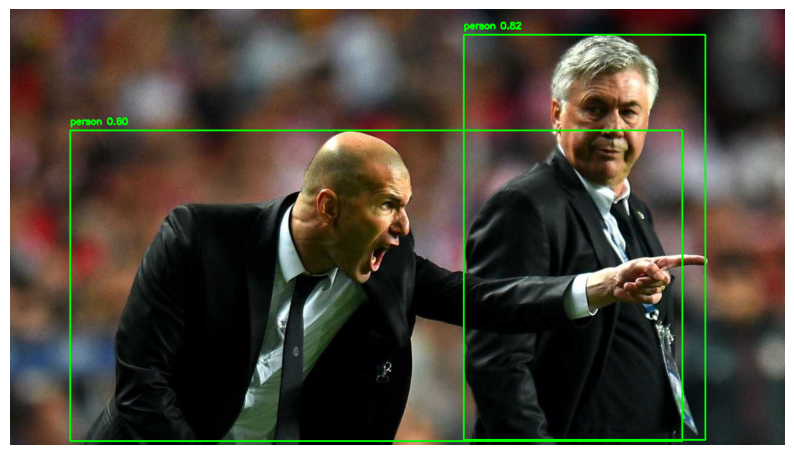

In [3]:
import torch
import cv2
import requests
import os
import matplotlib.pyplot as plt
from ultralytics import YOLO
from huggingface_hub import hf_hub_download

# CUDA 사용 여부 확인
device = "cuda" if torch.cuda.is_available() else "cpu"

# Hugging Face에서 YOLOv8 모델 다운로드
model_repo = "ultralytics/yolov8"
model_filename = "yolov8n.pt"

# 모델을 Hugging Face Hub에서 다운로드하여 저장
model_path = hf_hub_download(repo_id="ultralytics/yolov8", filename="yolov8n.pt")

# YOLOv8 모델 로드
model = YOLO(model_path).to(device)
print(f"YOLOv8 model loaded on {device}")

# 테스트 이미지 다운로드
image_path = "test.jpg"
image_url = "https://ultralytics.com/images/zidane.jpg"

if not os.path.exists(image_path):
    print("Downloading test image...")
    response = requests.get(image_url, stream=True)
    if response.status_code == 200:
        with open(image_path, "wb") as file:
            file.write(response.content)
        print("Test image downloaded successfully!")
    else:
        raise Exception("Failed to download test image.")

# 이미지 로드 및 변환
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR을 사용하므로 RGB 변환

# YOLOv8 객체 탐지 수행
results = model(image_rgb)

# 탐지 결과 시각화
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # 바운딩 박스 좌표
        conf = box.conf[0]  # 신뢰도
        cls = int(box.cls[0])  # 클래스 인덱스

        # 클래스 이름 가져오기
        class_name = model.names[cls]

        # 바운딩 박스 그리기
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, f"{class_name} {conf:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 출력
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()
